# 유방암 데이터 셋 차원축소

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 데이터 정규화

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

### feature 개수 30개일 때의 분류 성능

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, test_size=0.2, stratify=cancer.target, random_state=11
)

In [5]:
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.8947368421052632

### feature 개수 10개로 차원 축소

In [6]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
cancer_pca10 = pca10.fit_transform(cancer_std)

In [7]:
columns10 = []
for i in range(1, 11):
    columns10.append(f'PC{i}')
df_pca10 = pd.DataFrame(data=cancer_pca10, columns=columns10)
df_pca10['target'] = cancer.target
df_pca10

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398411,-0.157109,-0.877421,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657,0.013359,0.240992,-0.711910,1.107003,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097375,0.024065,0.454273,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059568,-1.405439,-1.116986,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636374,-0.263803,0.377701,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596129,-0.035469,0.987921,0.257005,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510722,-0.246710,-0.716326,-1.113358,-0.105212,-0.108623,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341888,0.393916,0.520879,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223081,-0.280242,-0.542027,-0.089315,0


#### 분류 성능 측정

In [8]:
pc10_X_train, pc10_X_test, pc10_y_train, pc10_y_test = train_test_split(
    df_pca10.iloc[:, :10], cancer.target, test_size=0.2, stratify=cancer.target, random_state=11
)

In [9]:
dtc.fit(pc10_X_train, pc10_y_train)
pc10_pred = dtc.predict(pc10_X_test)
accuracy_score(pc10_y_test, pc10_pred)

0.9210526315789473

### feature 개수 5개로 차원 축소

In [10]:
pca5 = PCA(n_components=5)
cancer_pca5 = pca5.fit_transform(cancer_std)

In [11]:
columns5 = []
for i in range(1, 6):
    columns5.append(f'PC{i}')
df_pca5 = pd.DataFrame(data=cancer_pca5, columns=columns5)
df_pca5['target'] = cancer.target
df_pca5

,PC1,PC2,PC3,PC4,PC5,target
0,9.192837,1.948583,-1.123166,3.633730,-1.195113,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621778,0
2,5.733896,-1.075174,-0.551748,0.912082,-0.177088,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,0
4,3.935302,-1.948072,1.389767,2.940640,0.546747,0
...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074826,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510721,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809992,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0


#### 분류 성능 측정

In [12]:
pc5_X_train, pc5_X_test, pc5_y_train, pc5_y_test = train_test_split(
    df_pca5.iloc[:, :5], cancer.target, test_size=0.2, stratify=cancer.target, random_state=11
)

In [13]:
dtc.fit(pc5_X_train, pc5_y_train)
pc5_pred = dtc.predict(pc5_X_test)
accuracy_score(pc5_y_test, pc5_pred)

0.9035087719298246

### feature 개수 2개로 차원 축소

In [14]:
pca2 = PCA(n_components=2)
cancer_pca2 = pca2.fit_transform(cancer_std)

In [15]:
columns2 = []
for i in range(1, 3):
    columns2.append(f'PC{i}')
df_pca2 = pd.DataFrame(data=cancer_pca2, columns=columns2)
df_pca2['target'] = cancer.target
df_pca2

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


#### 분류 성능 측정

In [16]:
pc2_X_train, pc2_X_test, pc2_y_train, pc2_y_test = train_test_split(
    df_pca2.iloc[:, :2], cancer.target, test_size=0.2, stratify=cancer.target, random_state=11
)

In [17]:
dtc.fit(pc2_X_train, pc2_y_train)
pc2_pred = dtc.predict(pc2_X_test)
accuracy_score(pc2_y_test, pc2_pred)

0.8859649122807017

In [18]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

#### 시각화

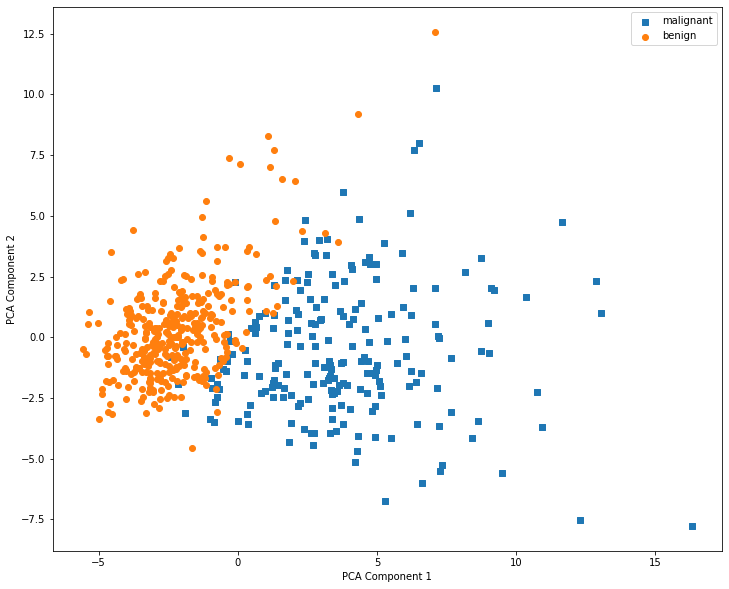

In [22]:
markers = ['s', 'o']
plt.figure(figsize=(12, 10))
for i, marker in enumerate(markers):
    x_axis_data = df_pca2[df_pca2['target'] == i]['PC1']
    y_axis_data = df_pca2[df_pca2['target'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()